In [43]:
import numpy as np
import matplotlib.pyplot as plt


In [44]:
#  Parámetros del problema
a1 = 96 #m
W = 100 #m (y)
L = 500 #m (x)
e_y = 0.5 #m2/s
u = 1 #m/s
v = -0.15 #m/s
ke = 10/86400 #1/s
c0 = 100 #m/s
cb = 1 #m/s

In [45]:
Ny = 101
Nx = 201

x_grilla = np.linspace(0, L, Nx)
y_grilla = np.linspace(0, W, Ny)

dy = W/(Ny-1)
dx = L/(Nx-1)

print("dx = %.3f m, dy = %.3f m" % (dx, dy))
print(x_grilla)

dx = 2.500 m, dy = 1.000 m
[  0.    2.5   5.    7.5  10.   12.5  15.   17.5  20.   22.5  25.   27.5
  30.   32.5  35.   37.5  40.   42.5  45.   47.5  50.   52.5  55.   57.5
  60.   62.5  65.   67.5  70.   72.5  75.   77.5  80.   82.5  85.   87.5
  90.   92.5  95.   97.5 100.  102.5 105.  107.5 110.  112.5 115.  117.5
 120.  122.5 125.  127.5 130.  132.5 135.  137.5 140.  142.5 145.  147.5
 150.  152.5 155.  157.5 160.  162.5 165.  167.5 170.  172.5 175.  177.5
 180.  182.5 185.  187.5 190.  192.5 195.  197.5 200.  202.5 205.  207.5
 210.  212.5 215.  217.5 220.  222.5 225.  227.5 230.  232.5 235.  237.5
 240.  242.5 245.  247.5 250.  252.5 255.  257.5 260.  262.5 265.  267.5
 270.  272.5 275.  277.5 280.  282.5 285.  287.5 290.  292.5 295.  297.5
 300.  302.5 305.  307.5 310.  312.5 315.  317.5 320.  322.5 325.  327.5
 330.  332.5 335.  337.5 340.  342.5 345.  347.5 350.  352.5 355.  357.5
 360.  362.5 365.  367.5 370.  372.5 375.  377.5 380.  382.5 385.  387.5
 390.  392.5 395.  397.5

In [46]:
# Coeficientes CORRECTOS (hacia atras en x, central en y)
a = 0
b = -u/dx
c = v/(2*dy) - e_y/(dy**2)
d = -v/(2*dy) - e_y/(dy**2)
e = u/dx + 2*e_y/(dy**2) + ke 
f=0


In [47]:

cA = np.zeros((Nx, Ny))

# Parámetro
j_a = int(a1 / dy)

# CB1: dc/dy=0 en y=0
cA[:, 0] = cA[:, 1]

# CB2: dc/dy=0 en y=W  
cA[:, Ny-1] = cA[:, Ny-2]

# CB3: C=Co en x=0, a≤y≤W
cA[0, j_a:] = c0

# CB4: C=Co en x=0, 0≤y
cA[0, :j_a] = cb

#condicion de salida en x=L
cA[Nx-1, :] = cA[Nx-2, :]

#Residuo total 
if (u < 1 and u > 0) and e_y > 1:
    omega = 1.5
else:
    omega = 0.7
residuo_total = 1

tolerancia = 1.0e-6

# Arbitrary value at the begining, higher than resid_crit
resid_ave = 100.
cnt_it = 0

while resid_ave > tolerancia:
    resid_ave = 0.
    cnt_points = 0
    cA_antes = cA.copy()
    
    # Actualizar nodos interiores
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):

            residual = a * cA[i+1,j] + b * cA[i-1,j] + c * cA[i,j+1]+ d * cA[i,j-1] + e * cA[i,j] - f
            
            cA[i,j] += -omega*residual/e

            resid_ave += abs(residual) 
            
            cnt_points += 1

    #  Get average residual
    resid_ave = resid_ave/cnt_points
    # CB1: y=0 (Neumann - flujo nulo)
    cA[:, 0] = cA[:, 1]
    
    # CB2: y=W (Neumann - flujo nulo)
    cA[:, Ny-1] = cA[:, Ny-2]
    
    # CB3 y CB4: x=0 (Dirichlet - se MANTIENEN FIJAS)
    cA[0, j_a:] = c0
    cA[0, :j_a] = cb
    
    # Condición de salida en x=L (Neumann - flujo nulo)
    cA[-1, :] = cA[-2, :]
  
    # Calcular residuo
    
    residuo_total = np.abs(cA - cA_antes).max()
    cnt_it += 1
    # Print every 1000-dth residual
    if cnt_it%1000==0:
        print("Residual: %.7f" % resid_ave)
    
    # Count iterations
    cnt_it = cnt_it + 1
    
print(f"\nConvergencia en {cnt_it} iteraciones")



Convergencia en 1644 iteraciones


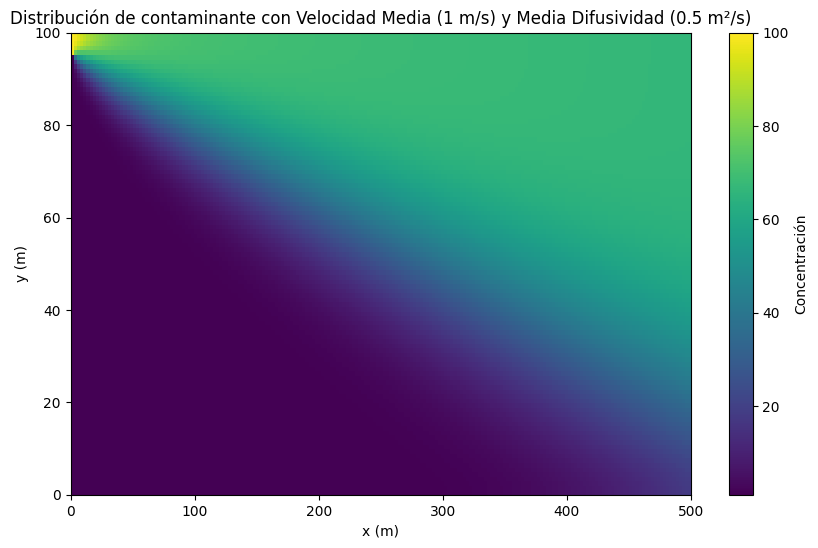

In [48]:
# Visualización
if u >= 2 and e_y < 0.05:
    plt.figure(figsize=(10, 6))
    plt.imshow(cA.T, extent=[0, L, 0, W], origin='lower', cmap='viridis', aspect='auto', vmin=min(c0, cb), vmax=max(c0, cb))
    plt.colorbar(label='Concentración')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title(f'Distribución de contaminante con Alta Velocidad (u = {u} m/s) y Baja Difusividad({e_y} m²/s)')
    plt.show()
elif (u < 1 and u > 0) and e_y > 1 :
    plt.figure(figsize=(10, 6))
    plt.imshow(cA.T, extent=[0, L, 0, W], origin='lower', cmap='viridis', aspect='auto', vmin=min(c0, cb), vmax=max(c0, cb))
    plt.colorbar(label='Concentración')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title(f'Distribución de contaminante con Baja Velocidad ({u} m/s) y Alta Difusividad({e_y} m²/s)')
    plt.show()
else:
    plt.figure(figsize=(10, 6))
    plt.imshow(cA.T, extent=[0, L, 0, W], origin='lower', cmap='viridis', aspect='auto', vmin=min(c0, cb), vmax=max(c0, cb))
    plt.colorbar(label='Concentración')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title(f'Distribución de contaminante con Velocidad Media ({u} m/s) y Media Difusividad ({e_y} m²/s)')
    plt.show()

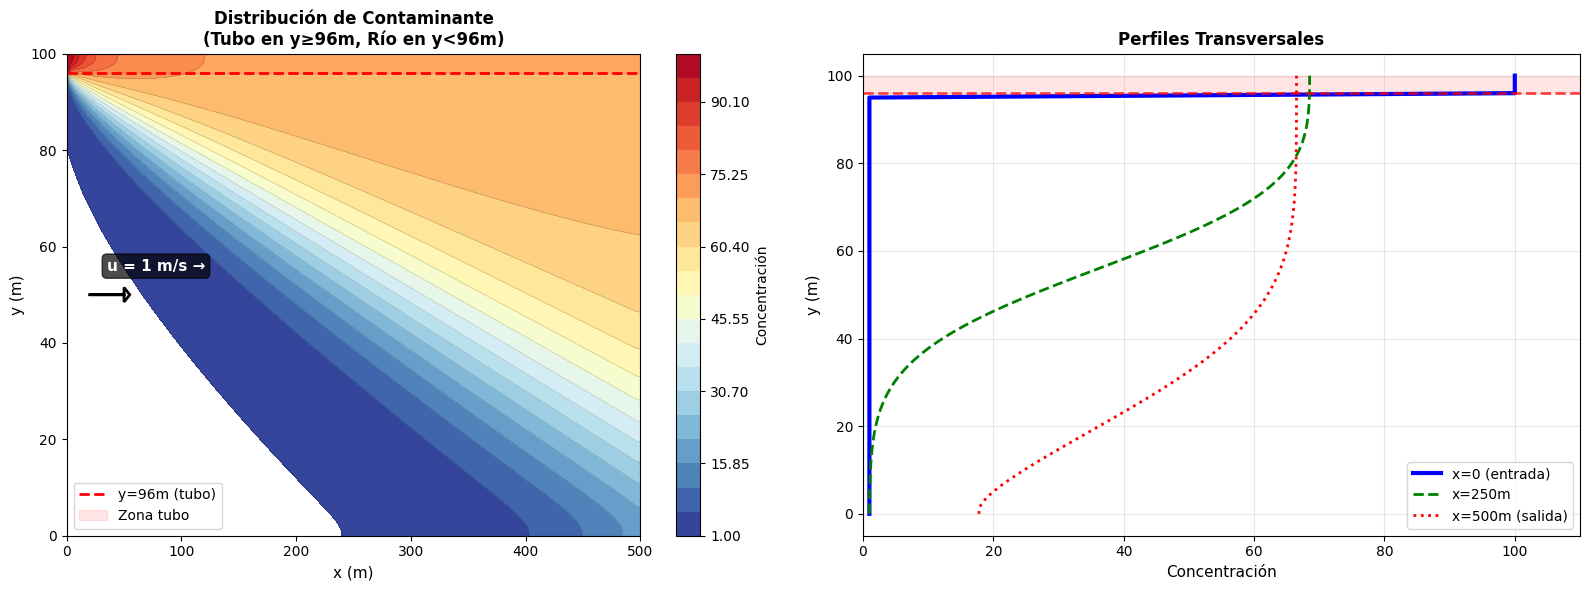

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax1 = axes[0]
# CORRECCIÓN: De cb (bajo) a c0 (alto)
levels = np.linspace(cb, c0, 21)  # De 1 a 100 (creciente)
cp = ax1.contourf(x_grilla, y_grilla, cA.T, levels=levels, cmap='RdYlBu_r')
plt.colorbar(cp, ax=ax1, label='Concentración')
ax1.contour(x_grilla, y_grilla, cA.T, levels=levels, colors='k', alpha=0.2, linewidths=0.5)
ax1.axhline(y=a1, color='red', linestyle='--', linewidth=2, label=f'y={a1}m (tubo)')
ax1.arrow(20, 50, 30, 0, head_width=3, head_length=5, fc='white', ec='black', linewidth=2)
ax1.text(35, 55, 'u = 1 m/s →', color='white', fontsize=11, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='black', alpha=0.7))
# Marcar zona del tubo
ax1.axhspan(a1, W, alpha=0.1, color='red', label='Zona tubo')
ax1.set_title(f'Distribución de Contaminante\n(Tubo en y≥{a1}m, Río en y<{a1}m)', 
              fontsize=12, fontweight='bold')
ax1.set_xlabel('x (m)', fontsize=11)
ax1.set_ylabel('y (m)', fontsize=11)
ax1.legend(fontsize=10)
3
ax2 = axes[1]
ax2.plot(cA[0, :], y_grilla, 'b-', linewidth=3, label='x=0 (entrada)')
ax2.plot(cA[Nx//2, :], y_grilla, 'g--', linewidth=2, label=f'x={L/2:.0f}m')
ax2.plot(cA[Nx-1, :], y_grilla, 'r:', linewidth=2, label=f'x={L}m (salida)')
ax2.axhline(y=a1, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax2.axhspan(a1, W, alpha=0.1, color='red')
ax2.set_xlabel('Concentración', fontsize=11)
ax2.set_ylabel('y (m)', fontsize=11)
ax2.set_title('Perfiles Transversales', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xlim([0, c0*1.1])

plt.tight_layout()
plt.show()